<a href="https://colab.research.google.com/github/prithivi96/Dimensionality-Reduction/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Dataset MNIST

In [23]:
import pandas as pd 
from urllib.request import urlretrieve
import numpy as np
import os
import matplotlib.pyplot as plt


In [7]:
from google.colab import drive

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
"mnist_train.csv" in os.listdir('/content/drive/MyDrive')

True

In [18]:
d0 = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")

In [19]:
l = d0['label']
d = d0.drop('label',axis=1)

In [21]:
print(l.shape,d.shape)

(42000,) (42000, 784)


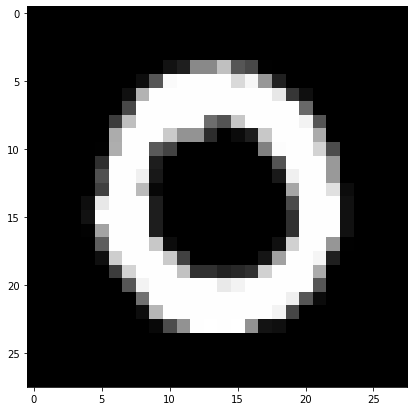

In [27]:
#Display a number from the given data set
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[1].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()


2D Visualization using PCA

In [30]:
# 1. Column Standarization
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(42000, 784)


In [32]:
type(standardized_data)

numpy.ndarray

In [33]:
#2.find the co-variance matrix which is : A^T * A 
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [34]:
#3.Find Eigen values and eigen vectors of the covariance matrix 
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [37]:
#4. Projecting the Sample data over the top two eigen vectors by matrix multiplication
print(sample_data.shape)
# print(covar_matrix.shape)
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)


(42000, 784)
 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [40]:
import pandas as pd
#4.Appending the projected datapoints with the lablels
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, l)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

ValueError: ignored

In [42]:
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


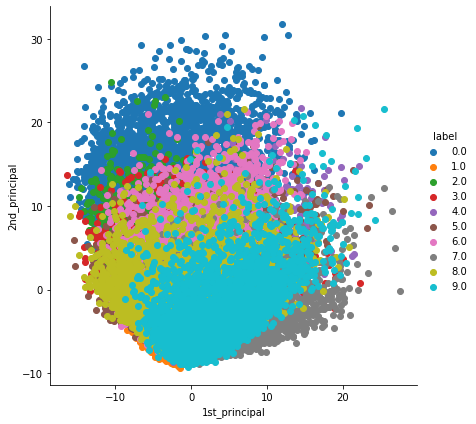

In [47]:
# 5.ploting the 2d data points with seaborn
import seaborn as sn
# sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
sn.FacetGrid(dataframe,hue="label",height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

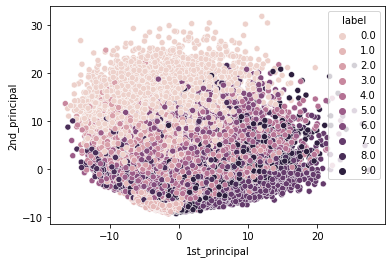

In [48]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)

PCA using Sklearn Module


In [49]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [50]:
#Finding the PCA matrix 
pca.n_components=2
pca_data = pca.fit_transform(sample_data)

In [51]:
pca_data.shape

(42000, 2)

In [54]:
#Attaching the label
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, l)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()



ValueError: ignored

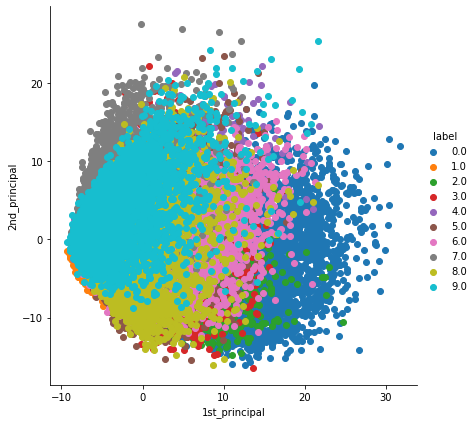

In [55]:
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()